In [2]:
import math
import numpy
import matplotlib.pyplot as pyplot

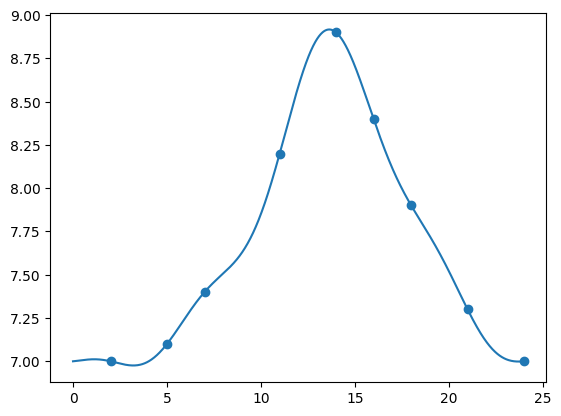

In [3]:
# 1.

def generalized_polynomial(solution, basis):
    def function(x):
        y = 0
        for coeff, function in zip(solution, basis):
            y += coeff * function(x)
        return y
    return function

def fourier_basis(degree, period):
    basis = numpy.array([lambda x: 1])
    for i in range(1, degree + 1):
            basis = numpy.append(basis, lambda x, i=i: numpy.cos(2 * numpy.pi / period * i * x))
            basis = numpy.append(basis, lambda x, i=i: numpy.sin(2 * numpy.pi / period * i * x))
    return basis

xs = numpy.array([2, 5, 7, 11, 14, 16, 18, 21, 24])
ys = numpy.array([7, 7.1, 7.4, 8.2, 8.9, 8.4, 7.9, 7.3, 7])
period = 24

x_axis = numpy.linspace(0, period, 1000)

basis = fourier_basis(4, period)
matrix = numpy.array([numpy.array([function(x) for function in basis]) for x in xs])
solution = numpy.linalg.solve(matrix, ys)

pyplot.scatter(xs, ys)
pyplot.plot(x_axis, generalized_polynomial(solution, basis)(x_axis))
pyplot.show()

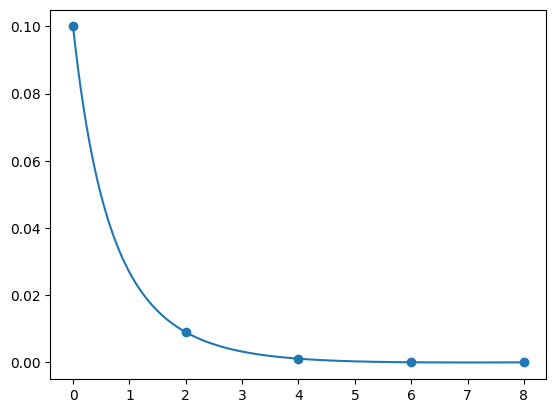

In [4]:
# 2.

xs = numpy.array([0, 2, 4, 6, 8])
ys = numpy.array([0.1, 0.009, 0.0011, 0.00003, 0.0000012])

x_axis = numpy.linspace(xs.min(), xs.max(), 1000)

basis = numpy.array([lambda x, i=i: 1 / (1 + i + x) for i in range(len(xs))])
matrix = numpy.array([numpy.array([function(x) for function in basis]) for x in xs])
solution = numpy.linalg.solve(matrix, ys)

pyplot.scatter(xs, ys)
pyplot.plot(x_axis, generalized_polynomial(solution, basis)(x_axis))
pyplot.show()

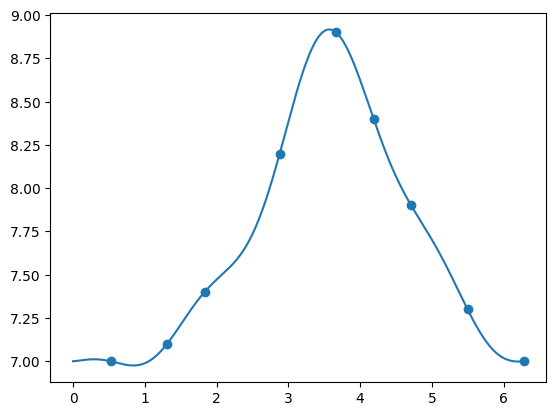

In [5]:
# 3.

# period of 2 * pi
def lagrange_polynomial(xs, ys):
    def function(x):
        y = 0
        for xi, yi in zip(xs, ys):
            yj = 1
            for xj in xs:
                if xj != xi:
                    yj *= numpy.sin((x - xj) / 2) / numpy.sin((xi - xj) / 2)
            y += yj * yi
        return y
    return function

xs = numpy.array([2, 5, 7, 11, 14, 16, 18, 21, 24])
ys = numpy.array([7, 7.1, 7.4, 8.2, 8.9, 8.4, 7.9, 7.3, 7])
period = 24
xs = 2 * numpy.pi / period * xs # stretch nodes by 2 * pi / period

x_axis = numpy.linspace(0, 2 * numpy.pi, 1000)

pyplot.scatter(xs, ys)
pyplot.plot(x_axis, lagrange_polynomial(xs, ys)(x_axis))
pyplot.show()